### Secret Manager Function

In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

### Connect to Database

In [2]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

# Q1 – Mississippi Population Growth Rate

/tmp/ipykernel_14144/744998882.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


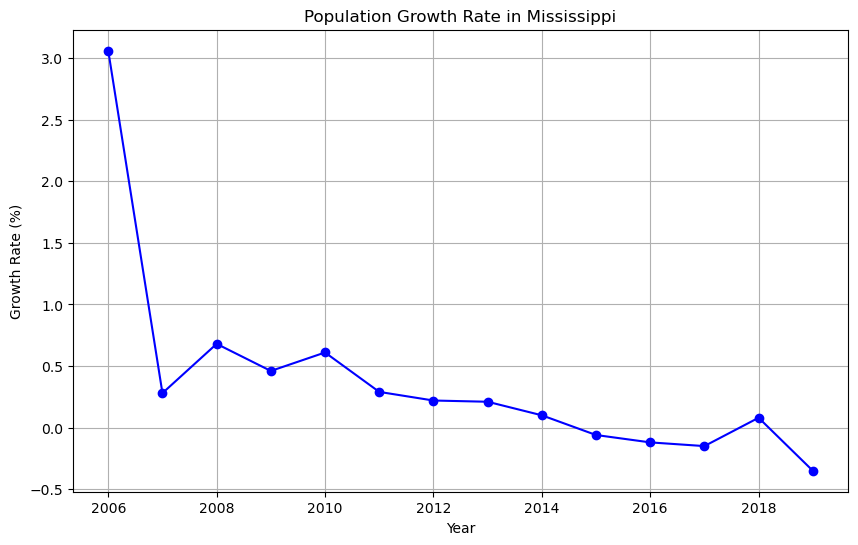

In [3]:
import pandas as pd

query = """
SELECT p.year,
       p.pop,
       ROUND(100.0 * (p.pop - LAG(p.pop) OVER (ORDER BY p.year)) / LAG(p.pop) OVER (ORDER BY p.year), 2) 
       AS growth_rate
FROM population p
JOIN name n ON p.fips = n.fips
WHERE n.name = 'Mississippi'
ORDER BY p.year;
"""

df = pd.read_sql(query, conn)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df['year'], df['growth_rate'], marker='o', color="blue")
plt.title("Population Growth Rate in Mississippi")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()


Explanation: The population growth rate in Mississippi has decreased significantly throughtout the years.

# Q2 – Income and Population Relationship

/tmp/ipykernel_14144/1634861981.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


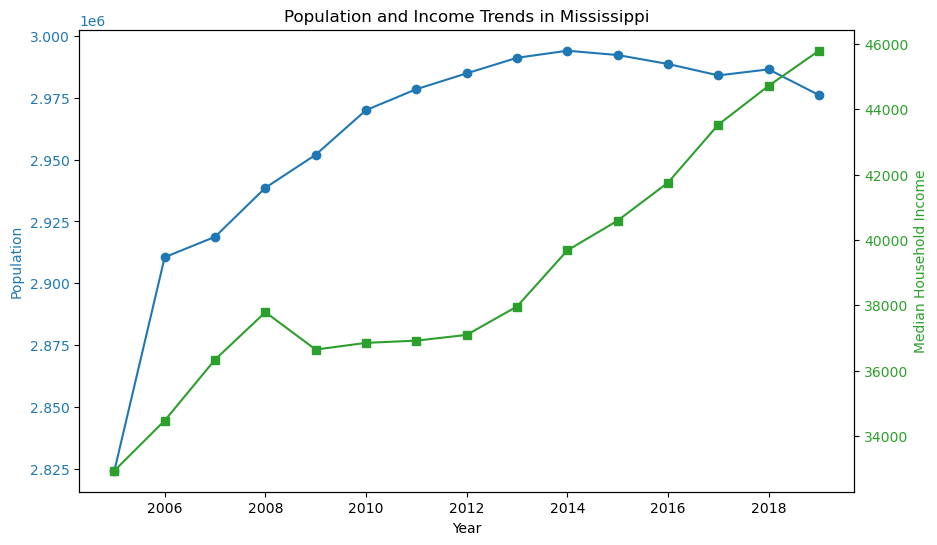

In [4]:
query = """
SELECT i.year, i.income, p.pop
FROM income i
JOIN population p 
  ON i.fips = p.fips AND i.year = p.year
JOIN name n 
  ON i.fips = n.fips
WHERE n.name = 'Mississippi'
ORDER BY i.year;
"""

df = pd.read_sql(query, conn)

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel("Year")
ax1.set_ylabel("Population", color="tab:blue")
ax1.plot(df['year'], df['pop'], color="tab:blue", marker="o")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Median Household Income", color="tab:green")
ax2.plot(df['year'], df['income'], color="tab:green", marker="s")
ax2.tick_params(axis="y", labelcolor="tab:green")

plt.title("Population and Income Trends in Mississippi")
plt.show()


Explanation: The population and income trends is positive. The population matches with the income ranging a median of 46,000. 

# Q3 – Student-Defined Question

/tmp/ipykernel_14144/2441732014.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


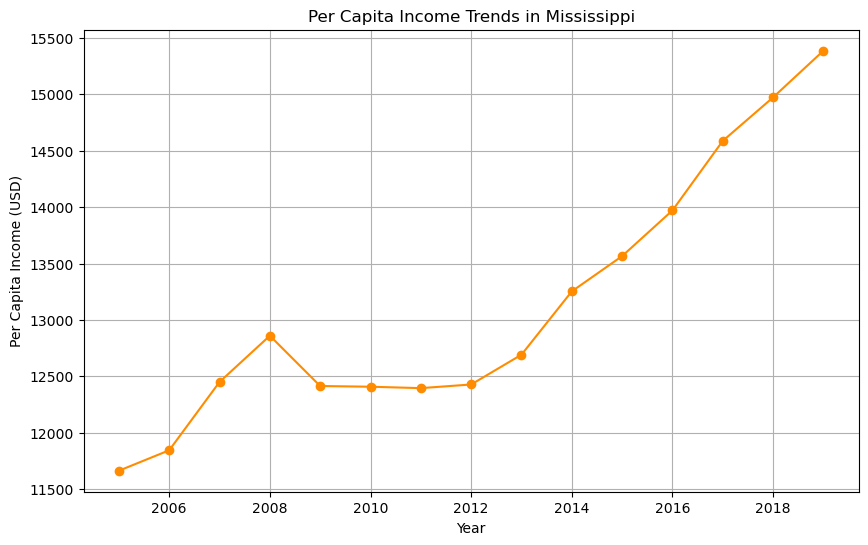

In [5]:
query = """
SELECT 
    i.year,
    ROUND((CAST(i.income AS NUMERIC) / p.pop) * 1000000, 2) AS per_capita_income
FROM income i
JOIN population p 
  ON i.fips = p.fips AND i.year = p.year
JOIN name n 
  ON i.fips = n.fips
WHERE n.name = 'Mississippi'
ORDER BY i.year;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10,6))
plt.plot(df['year'], df['per_capita_income'], marker='o', color="darkorange")
plt.title("Per Capita Income Trends in Mississippi")
plt.xlabel("Year")
plt.ylabel("Per Capita Income (USD)")
plt.grid(True)
plt.show()


Explanation: The pet capita income trends in mississippi has increased significantly. It has consistently increased since 2012.